# 🌟 **Seeing Theory in Action: Electric Field ↔ Position Operator**

Let’s now see what we’ve been learning...

How the **electric field amplitude** (**q**) behaves like the **position coordinate** of a **quantum harmonic oscillator**.  

💻 **What we’ll do:**

- Use a small **Qiskit + Python simulation** to visualize this connection.
- Explore **every line of code** step by step to understand the **physics behind it**.
- Observe how the **matrix structure of the position operator** reflects the **quantized energy levels** of the oscillator.

⚡ By the end of this simulation, we’ll be able to  **see the electric field amplitude emerge naturally** from the quantum harmonic oscillator model!


# Topic: **Photon in a Cavity**

We will:

>- Model one **bosonic harmonic oscillator** (a single cavity mode)
>- Compute and visualize the **electric field amplitude ⟨q⟩** for:
>  - the **vacuum state** |0⟩
>  - the **one-photon (Fock) state** |1⟩
>- See how **q → electric field amplitude** works in action



%pip install qutip


# QuTiP = Quantum Toolbox in Python! <a id="QuTip"></a>

It’s one of the most widely used libraries in quantum optics and quantum computing research.

It allows us to simulate:

- **Quantum harmonic oscillators**
- **Photon fields**
- **Cavity QED systems**
- **Spin systems**
- **Noise & decoherence**

So, if we want to use the **exact same framework researchers use to model electric field quantization in the lab**, we should use **QuTiP**.


# Step 1: Import IMPORTANT LIBs <a id="step1"></a>



In [1]:
# import important libs qiskit qutip matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, qeye, destroy, expect, position, qfunc


# Step 2: Define **One Quantum Harmonic Oscillator Mode**

> 💡 **Remember:**  
> Electric field ∝ `(a + a†)` → proportional to **q**, the position operator.


In [2]:
#Step 2: Define one quantum harmonic oscillator mode
# Hilbert space size (number of energy levels)
N = 10   # enough for low photon numbers

# Create the annihilation operator â for the oscillator
a = destroy(N)

# Position operator q = (a + a†) / sqrt(2)
q = (a + a.dag()) / np.sqrt(2)


# Remember:
#Electric field ∝ (a + a†) → proportional to q, the position operator.

 # **Step 3: Define our states**




In [3]:
#Step 3: Define our states
# Vacuum state |0>
vacuum = basis(N, 0)

# One-photon state |1>
one_photon = basis(N, 1)



# Step 4: Compute Expectation Values of **q** (Electric Field Amplitude)

💬 **Observation Table:**

- ✨ **Vacuum state** (|0⟩):  
  - Average field ⟨q⟩ = 0  
  - Minimal fluctuations (quantum zero-point motion)
    

- ⚡ **One-photon (Fock) state** (|1⟩):  
  - Average field ⟨q⟩ = 0  
  - **Fluctuations increase!**  

> 💡 **Note:** This is purely **quantum behavior** — no classical oscillation, but **quantized variance**.  
> The system shows that even when the average field is zero, the **uncertainty (fluctuations)** is nonzero.


In [4]:

# Step 4: Compute expectation values of q (Electric field amplitude)

# Expectation value of electric field amplitude
E_vac = expect(q, vacuum)
E_1ph = expect(q, one_photon)

print("⟨E⟩ in vacuum state |0⟩ =", E_vac)
print("⟨E⟩ in one-photon state |1⟩ =", E_1ph)




⟨E⟩ in vacuum state |0⟩ = 0.0
⟨E⟩ in one-photon state |1⟩ = 0.0


# Step 5: Visualize the **electric field distribution**


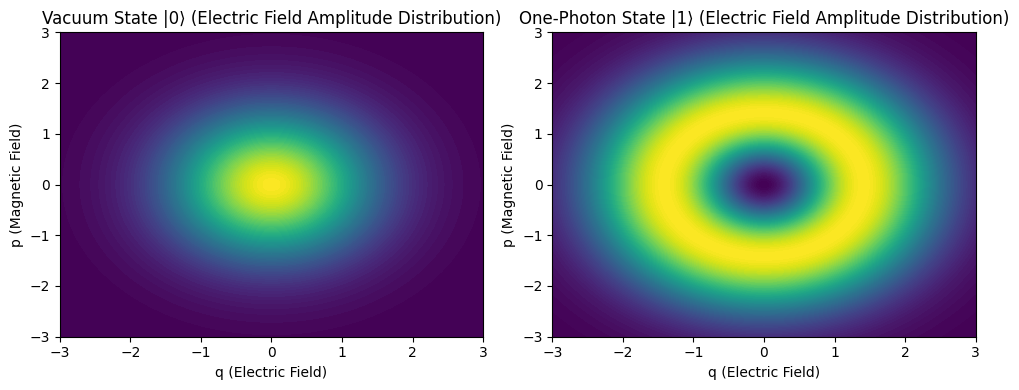

In [5]:
#Step 5: Visualize the electric field distribution

#We’ll plot the Q-function, a visual representation of the quantum state in phase space (q vs p).

x = np.linspace(-3, 3, 200)
y = np.linspace(-3, 3, 200)

Q_vac = qfunc(vacuum, x, y)
Q_1ph = qfunc(one_photon, x, y)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].contourf(x, y, Q_vac, 100)
axes[0].set_title("Vacuum State |0⟩ (Electric Field Amplitude Distribution)")
axes[0].set_xlabel("q (Electric Field)")
axes[0].set_ylabel("p (Magnetic Field)")

axes[1].contourf(x, y, Q_1ph, 100)
axes[1].set_title("One-Photon State |1⟩ (Electric Field Amplitude Distribution)")
axes[1].set_xlabel("q (Electric Field)")
axes[1].set_ylabel("p (Magnetic Field)")

plt.tight_layout()
plt.show()



# Step 6: **Interpretation**

| **State** | **What We’ll See** | **Meaning** |
|-----------|------------------|-------------|
| 🌌 **Vacuum** | A **symmetric Gaussian** centered at (q=0, p=0) | No photons, only **quantum noise** |
| ✨ **1 Photon** | A **ring-shaped pattern** | One quantum of energy — the **first excited state** of the oscillator |




> 🌿 **In plain words:**
>
> - ✨ The **vacuum field** still has a tiny electric field — these are **vacuum fluctuations**.  
> - ⚡ The **1-photon state** represents **one quantum of the oscillator’s vibration** — the field energy increased by **ℏω**.  
> - 🪞 In both cases, the **electric field** corresponds to the **position coordinate** of that quantum oscillator.


# ⚡ Electric Field ↔ Position Operator Mapping using Qiskit

In quantum optics, the **electric field** of a mode is proportional to the **position operator** of a harmonic oscillator.  

💡 **What we’ll do in this example:**

- 🔹 **Define ladder operators**:
  - `a` → annihilation operator  
  - `a†` → creation operator
- 🔹 **Truncate the Hilbert space** to the first few energy levels (here, **5 photons**) for manageable computation.
- 🔹 **Define the position operator**, which corresponds to the electric field amplitude:

$$
\mathbf{x} = \frac{\mathbf{a} + \mathbf{a}^\dagger}{\sqrt{2}}
$$

- 🔹 **Visualize the matrix** of the position operator to see its structure.
- 🔹 This operator **directly represents the electric field amplitude** of the cavity mode.



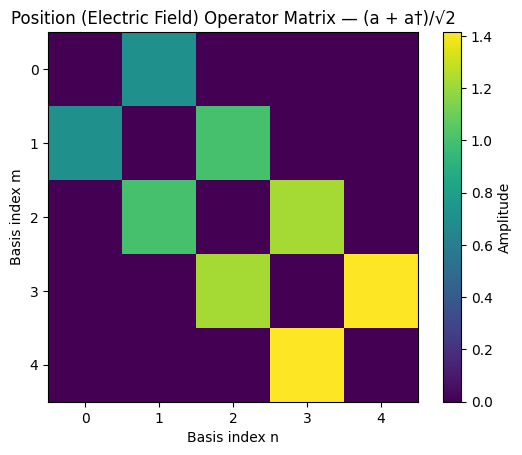

In [6]:
# Electric Field ↔ Position Operator Mapping using Qiskit

import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Operator
from qiskit.quantum_info.operators import SparsePauliOp

# Define ladder operators (for truncated Hilbert space)
def annihilation_operator(N):
    """Create the annihilation operator (a) for N-dimensional Fock space."""
    a = np.zeros((N, N))
    for n in range(1, N):
        a[n-1, n] = np.sqrt(n)
    return a

def creation_operator(N):
    """Create the creation operator (a†)."""
    return annihilation_operator(N).T

# Truncate to first few energy levels (e.g. 5 photons)
N = 5
a = annihilation_operator(N)
adag = creation_operator(N)

# Position operator (x) — proportional to electric field operator (E)
x_operator = (a + adag) / np.sqrt(2)

# Plot the matrix of the operator
plt.imshow(np.real(x_operator), cmap='viridis', interpolation='nearest')
plt.title("Position (Electric Field) Operator Matrix — (a + a†)/√2")
plt.colorbar(label='Amplitude')
plt.xlabel("Basis index n")
plt.ylabel("Basis index m")
plt.show()
